In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import sys

In [2]:
L95 = pd.read_csv('L95_Solution_Camp_2_10_100_No_control.csv')
median = pd.read_csv('median_Solution_Camp_2_10_100_No_control.csv')
middle = pd.read_csv('middle_R0_Solution_Camp_2_10_100_No_control.csv')
U95 = pd.read_csv('U95_Solution_Camp_2_10_100_No_control.csv')

L95 = L95.drop('Unnamed: 0', axis = 1)
median = median.drop('Unnamed: 0', axis = 1)
middle = middle.drop('Unnamed: 0', axis = 1)
U95 = U95.drop('Unnamed: 0', axis = 1)

In [3]:
middle.head()

,Susceptible: 0-20,Exposed: 0-20,Infected (symptomatic): 0-20,Asymptomatically Infected: 0-20,Recovered: 0-20,Hospitalised: 0-20,Critical: 0-20,Deaths: 0-20,Susceptible: 20-40,Exposed: 20-40,...,Susceptible,Exposed,Infected (symptomatic),Asymptomatically Infected,Recovered,Hospitalised,Critical,Deaths,New Exposure,New Deaths
0,0.399999,0.000000,1.000000e-06,1.000000e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.399999,0.000000,...,0.999997,0.000000,0.000003,0.000003,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
1,0.399998,0.000001,9.006020e-07,9.006020e-07,3.736420e-07,3.511826e-10,9.688126e-13,1.717739e-13,0.399998,0.000001,...,0.999994,0.000003,0.000002,0.000002,9.132091e-07,2.142214e-08,3.013007e-10,5.342167e-11,0.000004,5.342167e-11
2,0.399996,0.000002,9.473695e-07,9.473695e-07,7.390805e-07,6.539132e-10,3.128608e-12,1.162667e-12,0.399996,0.000002,...,0.999990,0.000006,0.000002,0.000002,1.808123e-06,3.988871e-08,9.729971e-10,3.615894e-10,0.000004,3.081677e-10
3,0.399994,0.000003,1.093054e-06,1.093054e-06,1.143987e-06,9.585613e-10,5.916730e-12,3.402925e-12,0.399994,0.000003,...,0.999986,0.000008,0.000003,0.000003,2.801015e-06,5.847224e-08,1.840103e-09,1.058310e-09,0.000004,6.967203e-10
4,0.399993,0.000004,1.319628e-06,1.319628e-06,1.623582e-06,1.297973e-09,9.187397e-12,7.158795e-12,0.399993,0.000004,...,0.999981,0.000011,0.000003,0.000003,3.977982e-06,7.917635e-08,2.857280e-09,2.226385e-09,0.000005,1.168076e-09


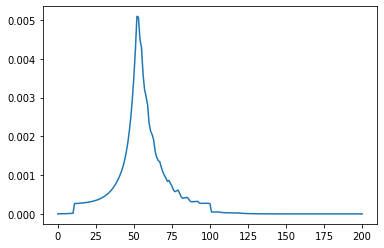

In [4]:
median['New Exposure'].plot(kind = 'line')

In [5]:
middle.columns

Index(['Susceptible: 0-20', 'Exposed: 0-20', 'Infected (symptomatic): 0-20',
       'Asymptomatically Infected: 0-20', 'Recovered: 0-20',
       'Hospitalised: 0-20', 'Critical: 0-20', 'Deaths: 0-20',
       'Susceptible: 20-40', 'Exposed: 20-40', 'Infected (symptomatic): 20-40',
       'Asymptomatically Infected: 20-40', 'Recovered: 20-40',
       'Hospitalised: 20-40', 'Critical: 20-40', 'Deaths: 20-40',
       'Susceptible: 40+', 'Exposed: 40+', 'Infected (symptomatic): 40+',
       'Asymptomatically Infected: 40+', 'Recovered: 40+', 'Hospitalised: 40+',
       'Critical: 40+', 'Deaths: 40+', 'Time', 'Susceptible', 'Exposed',
       'Infected (symptomatic)', 'Asymptomatically Infected', 'Recovered',
       'Hospitalised', 'Critical', 'Deaths', 'New Exposure', 'New Deaths'],
      dtype='object')

In [6]:
multiple_deaths = pd.melt(middle, id_vars = ['Time'], value_vars = ['Deaths: 0-20', 
                                                                    'Deaths: 20-40', 
                                                                    'Deaths: 40+',
                                                                    ])

In [7]:
multiple_hospitalised = pd.melt(middle, id_vars = ['Time'], value_vars = [
                                                                    'Hospitalised: 0-20',
                                                                    'Hospitalised: 20-40',
                                                                    'Hospitalised: 40+',
                                                                         ])

In [8]:
multiple_infected = pd.melt(middle, id_vars = ['Time'], value_vars = ['Exposed: 0-20', 
                                                                    'Exposed: 20-40', 
                                                                    'Exposed: 40+',
                                                                    ])

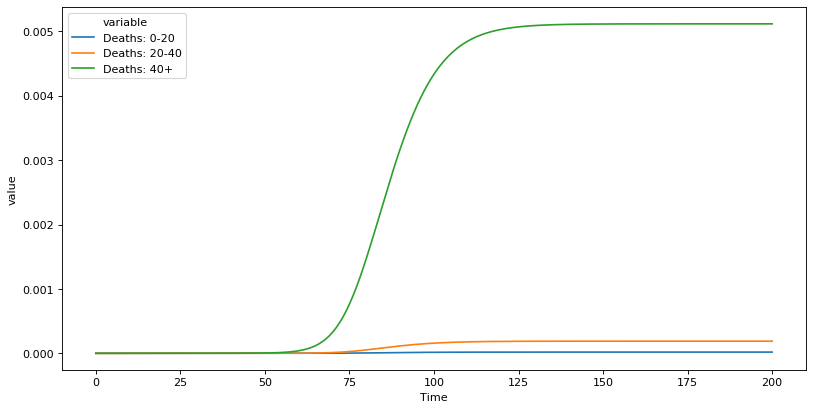

In [35]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
sns.lineplot(x = 'Time', y = 'value', data = multiple_deaths, hue = 'variable')

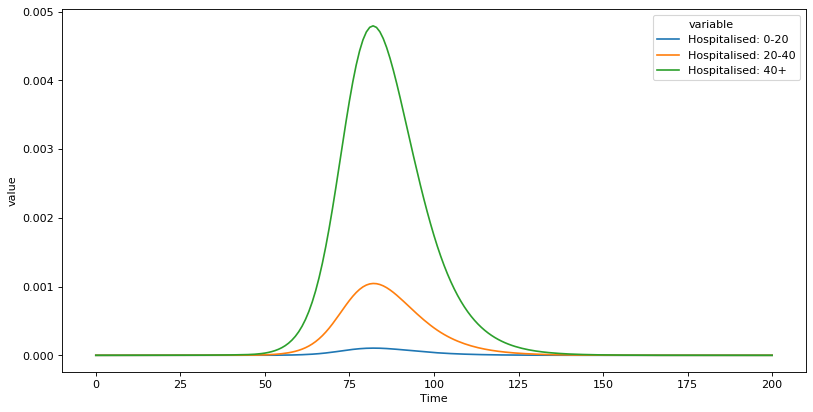

In [36]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
sns.lineplot(x = 'Time', y = 'value', data = multiple_hospitalised, hue = 'variable')

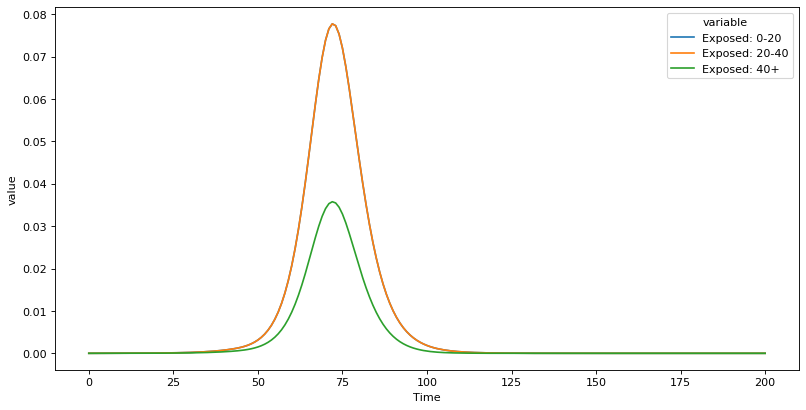

In [37]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
sns.lineplot(x = 'Time', y = 'value', data = multiple_infected, hue = 'variable')

In [48]:
middle['Exposed_0_20_diff'] = middle['Exposed: 0-20'].diff().fillna(0)
middle['Exposed_20_40_diff'] = middle['Exposed: 20-40'].diff().fillna(0)
middle['Exposed_40_diff'] = middle['Exposed: 40+'].diff().fillna(0)
middle['Hospitalised_0_20_diff'] = middle['Hospitalised: 0-20'].diff().fillna(0)
middle['Hospitalised_20_40_diff'] = middle['Hospitalised: 20-40'].diff().fillna(0)
middle['Hospitalised_40_diff'] = middle['Hospitalised: 40+'].diff().fillna(0)
middle['Deaths_0_20_diff'] = middle['Deaths: 0-20'].diff().fillna(0)
middle['Deaths_20_40_diff'] = middle['Deaths: 20-40'].diff().fillna(0)
middle['Deaths_40_diff'] = middle['Deaths: 40+'].diff().fillna(0)

In [49]:
middle.head()

,Susceptible: 0-20,Exposed: 0-20,Infected (symptomatic): 0-20,Asymptomatically Infected: 0-20,Recovered: 0-20,Hospitalised: 0-20,Critical: 0-20,Deaths: 0-20,Susceptible: 20-40,Exposed: 20-40,...,New Deaths,Exposed_0_20_diff,Exposed_20_40_diff,Exposed_40_diff,Hospitalised_0_20_diff,Hospitalised_20_40_diff,Hospitalised_40_diff,Deaths_0_20_diff,Deaths_20_40_diff,Deaths_40_diff
0,0.399999,0.000000,1.000000e-06,1.000000e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.399999,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.399998,0.000001,9.006020e-07,9.006020e-07,3.736420e-07,3.511826e-10,9.688126e-13,1.717739e-13,0.399998,0.000001,...,5.342167e-11,1.320772e-06,1.320772e-06,6.603862e-07,3.511826e-10,3.511826e-09,1.755913e-08,1.717739e-13,1.717739e-12,5.153216e-11
2,0.399996,0.000002,9.473695e-07,9.473695e-07,7.390805e-07,6.539132e-10,3.128608e-12,1.162667e-12,0.399996,0.000002,...,3.081677e-10,1.003686e-06,1.003686e-06,5.018431e-07,3.027306e-10,3.027306e-09,1.513653e-08,9.908930e-13,9.908930e-12,2.972679e-10
3,0.399994,0.000003,1.093054e-06,1.093054e-06,1.143987e-06,9.585613e-10,5.916730e-12,3.402925e-12,0.399994,0.000003,...,6.967203e-10,9.242584e-07,9.242584e-07,4.621292e-07,3.046481e-10,3.046481e-09,1.523241e-08,2.240258e-12,2.240258e-11,6.720775e-10
4,0.399993,0.000004,1.319628e-06,1.319628e-06,1.623582e-06,1.297973e-09,9.187397e-12,7.158795e-12,0.399993,0.000004,...,1.168076e-09,9.866490e-07,9.866490e-07,4.933245e-07,3.394116e-10,3.394116e-09,1.697058e-08,3.755870e-12,3.755870e-11,1.126761e-09


In [50]:
multiple_deaths_diff = pd.melt(middle, id_vars = ['Time'], value_vars = ['Deaths_0_20_diff', 
                                                                    'Deaths_20_40_diff', 
                                                                    'Deaths_40_diff',
                                                                    ])

In [51]:
multiple_hospitalised_diff = pd.melt(middle, id_vars = ['Time'], value_vars = [
                                                                    'Hospitalised_0_20_diff',
                                                                    'Hospitalised_20_40_diff',
                                                                    'Hospitalised_40_diff',
                                                                         ])

In [52]:
multiple_infected_diff = pd.melt(middle, id_vars = ['Time'], value_vars = ['Exposed_0_20_diff', 
                                                                    'Exposed_20_40_diff', 
                                                                    'Exposed_40_diff',
                                                                    ])

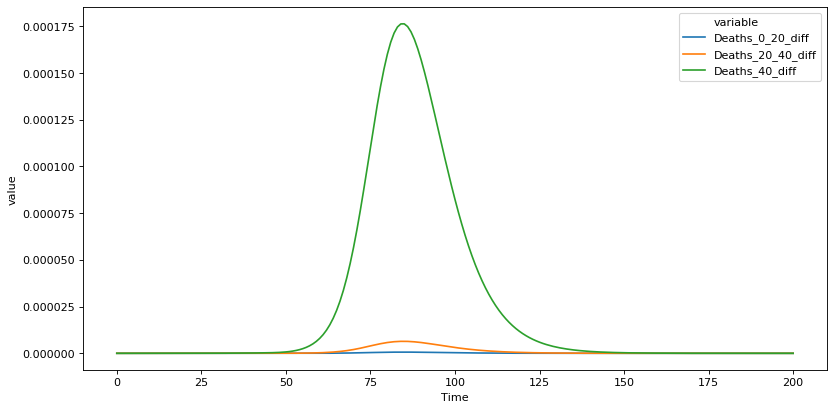

In [53]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
sns.lineplot(x = 'Time', y = 'value', data = multiple_deaths_diff, hue = 'variable')

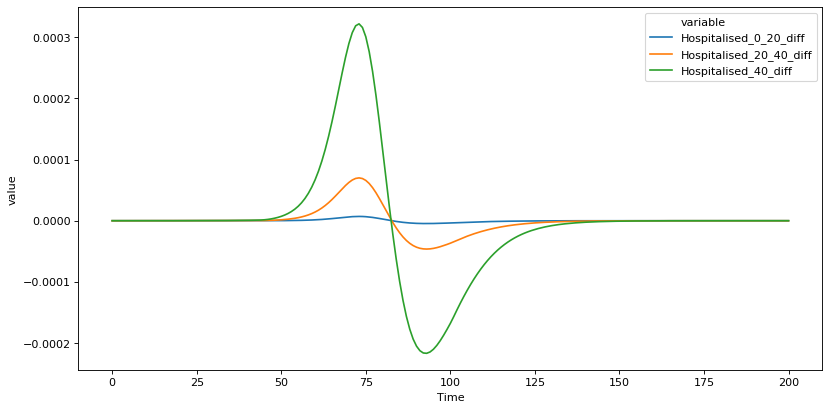

In [54]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
sns.lineplot(x = 'Time', y = 'value', data = multiple_hospitalised_diff, hue = 'variable')

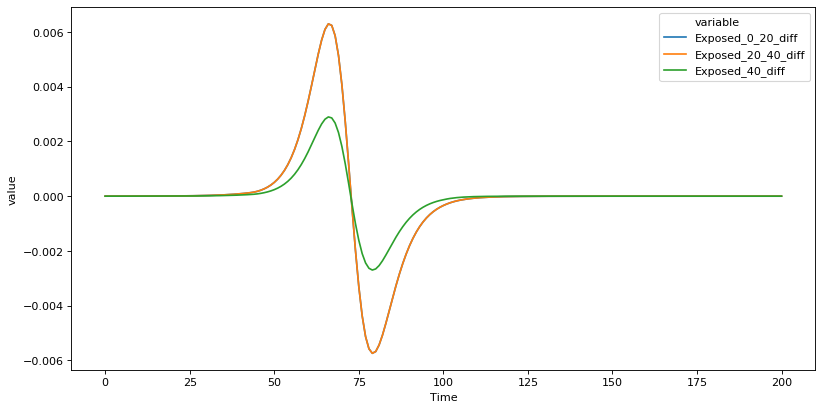

In [55]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
sns.lineplot(x = 'Time', y = 'value', data = multiple_infected_diff, hue = 'variable')

In [12]:
baseline=pd.read_csv('Baseline.csv')
baseline.drop('Unnamed: 0', axis = 1)

,Susceptible: 0-20,Exposed: 0-20,Infected (symptomatic): 0-20,Asymptomatically Infected: 0-20,Recovered: 0-20,Hospitalised: 0-20,Critical: 0-20,Deaths: 0-20,Susceptible: 20-40,Exposed: 20-40,...,Exposed,Infected (symptomatic),Asymptomatically Infected,Recovered,Hospitalised,Critical,Deaths,New Exposure,New Deaths,R0
0,0.399980,0.000000e+00,2.000000e-05,2.000000e-05,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.399980,0.000000e+00,...,0.000000e+00,5.000000e-05,5.000000e-05,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.0
1,0.399968,1.017757e-05,1.701121e-05,1.701121e-05,0.000007,6.888320e-09,1.917807e-11,3.414785e-12,0.399962,1.557256e-05,...,2.894591e-05,4.274590e-05,4.274590e-05,0.000018,4.190314e-07,9.776961e-09,1.742551e-09,3.281868e-05,1.742551e-09,2.0
2,0.399958,1.699963e-05,1.550351e-05,1.550351e-05,0.000014,1.214996e-08,6.003537e-11,2.270631e-11,0.399946,2.617496e-05,...,4.853243e-05,3.948802e-05,3.948802e-05,0.000034,7.334596e-07,3.038909e-08,1.154014e-08,2.941465e-05,9.797587e-09,2.0
3,0.399948,2.190886e-05,1.491971e-05,1.491971e-05,0.000020,1.641695e-08,1.078464e-10,6.456488e-11,0.399931,3.406419e-05,...,6.291853e-05,3.870578e-05,3.870578e-05,0.000049,9.797391e-07,5.395347e-08,3.260059e-08,2.839545e-05,2.106046e-08,2.0
4,0.399939,2.576731e-05,1.493020e-05,1.493020e-05,0.000026,2.008491e-08,1.561092e-10,1.306061e-10,0.399915,4.055858e-05,...,7.455581e-05,3.951675e-05,3.951675e-05,0.000065,1.181939e-06,7.686205e-08,6.537233e-08,2.886081e-05,3.277174e-08,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4015,0.003772,2.631453e-14,1.273965e-13,1.273965e-13,0.396228,2.267624e-12,3.212426e-14,1.981239e-05,0.000320,2.581881e-15,...,8.137514e-14,3.810659e-13,3.810659e-13,0.975444,1.849924e-10,2.371340e-11,9.678369e-03,6.796647e-15,1.437290e-11,6.0
4016,0.003772,2.211303e-14,1.070354e-13,1.070354e-13,0.396228,2.001195e-12,3.199041e-14,1.981239e-05,0.000320,2.169978e-15,...,6.841547e-14,3.204390e-13,3.204390e-13,0.975444,1.632619e-10,2.395430e-11,9.678369e-03,5.719383e-15,9.781523e-12,6.0
4017,0.003772,1.858302e-14,8.992623e-14,8.992623e-14,0.396228,1.766076e-12,3.389975e-14,1.981239e-05,0.000320,1.823867e-15,...,5.752148e-14,2.694493e-13,2.694493e-13,0.975444,1.440844e-10,2.585202e-11,9.678369e-03,4.808653e-15,6.947097e-12,6.0
4018,0.003772,1.561632e-14,7.554869e-14,7.554869e-14,0.396228,1.558572e-12,3.257651e-14,1.981239e-05,0.000320,1.532948e-15,...,4.836131e-14,2.265619e-13,2.265619e-13,0.975444,1.271587e-10,2.502612e-11,9.678369e-03,4.041906e-15,8.632081e-12,6.0


In [13]:
baseline.head()

,Unnamed: 0,Susceptible: 0-20,Exposed: 0-20,Infected (symptomatic): 0-20,Asymptomatically Infected: 0-20,Recovered: 0-20,Hospitalised: 0-20,Critical: 0-20,Deaths: 0-20,Susceptible: 20-40,...,Exposed,Infected (symptomatic),Asymptomatically Infected,Recovered,Hospitalised,Critical,Deaths,New Exposure,New Deaths,R0
0,0,0.399980,0.000000,0.000020,0.000020,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.399980,...,0.000000,0.000050,0.000050,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2.0
1,1,0.399968,0.000010,0.000017,0.000017,0.000007,6.888320e-09,1.917807e-11,3.414785e-12,0.399962,...,0.000029,0.000043,0.000043,0.000018,4.190314e-07,9.776961e-09,1.742551e-09,0.000033,1.742551e-09,2.0
2,2,0.399958,0.000017,0.000016,0.000016,0.000014,1.214996e-08,6.003537e-11,2.270631e-11,0.399946,...,0.000049,0.000039,0.000039,0.000034,7.334596e-07,3.038909e-08,1.154014e-08,0.000029,9.797587e-09,2.0
3,3,0.399948,0.000022,0.000015,0.000015,0.000020,1.641695e-08,1.078464e-10,6.456488e-11,0.399931,...,0.000063,0.000039,0.000039,0.000049,9.797391e-07,5.395347e-08,3.260059e-08,0.000028,2.106046e-08,2.0
4,4,0.399939,0.000026,0.000015,0.000015,0.000026,2.008491e-08,1.561092e-10,1.306061e-10,0.399915,...,0.000075,0.000040,0.000040,0.000065,1.181939e-06,7.686205e-08,6.537233e-08,0.000029,3.277174e-08,2.0


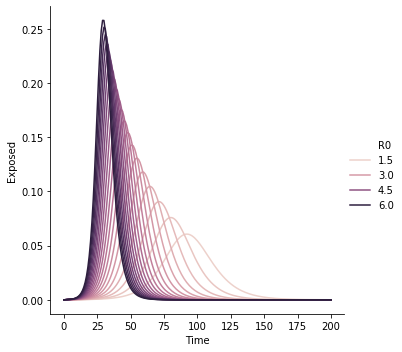

In [19]:
#Use this one

sns.relplot(x="Time", y="Exposed",
            hue="R0", kind="line", data=baseline)

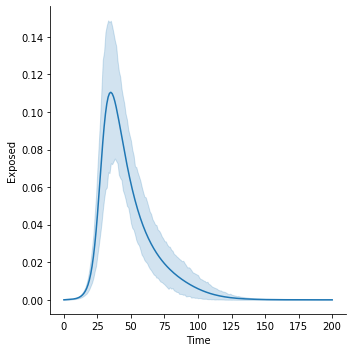

In [15]:
#Do not use this one

sns.relplot(x="Time", y="Exposed", kind="line", data=baseline)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


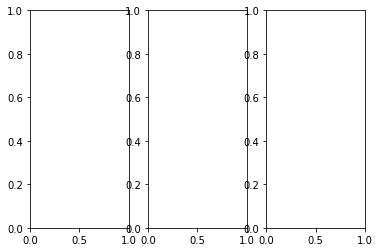

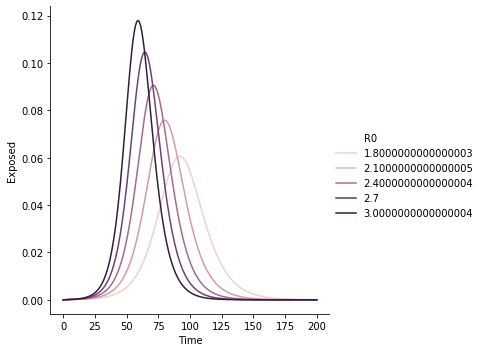

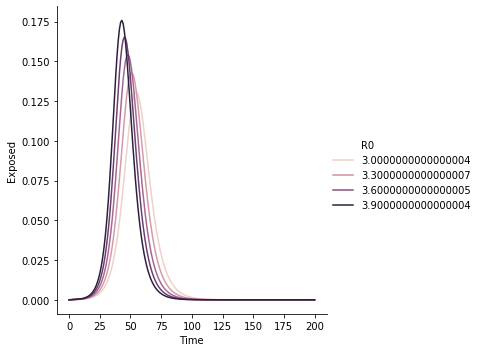

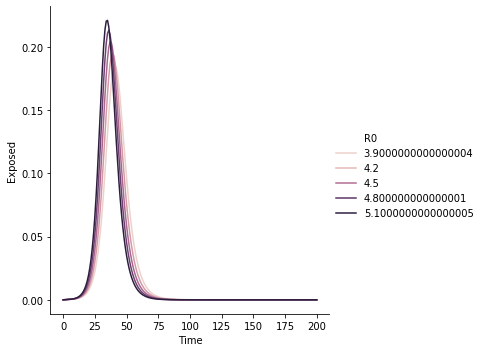

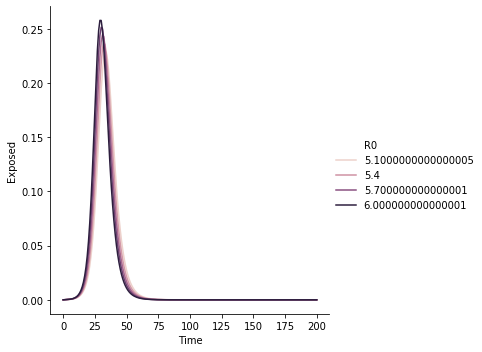

In [66]:
fig, ax =plt.subplots(1,3)

sns.relplot(x="Time", y="Exposed",
            hue="R0", kind="line", data=baseline[baseline.R0 < 3])

sns.relplot(x="Time", y="Exposed",
            hue="R0", kind="line", data=baseline[baseline.R0 >= 3][baseline.R0 < 4])

sns.relplot(x="Time", y="Exposed",
            hue="R0", kind="line", data=baseline[baseline.R0 >= 4][baseline.R0 < 5]);

sns.relplot(x="Time", y="Exposed",
            hue="R0", kind="line", data=baseline[baseline.R0 >= 5]);

fig.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


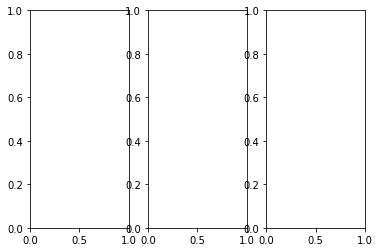

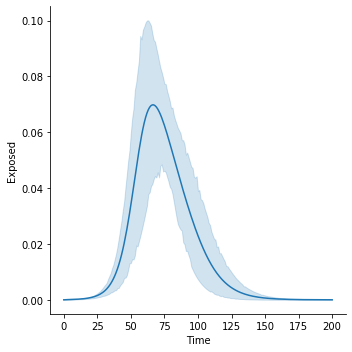

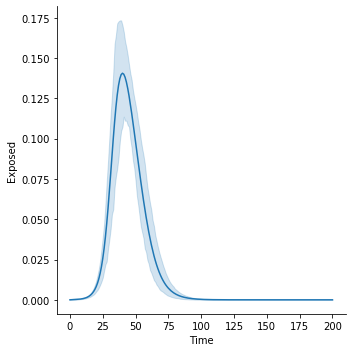

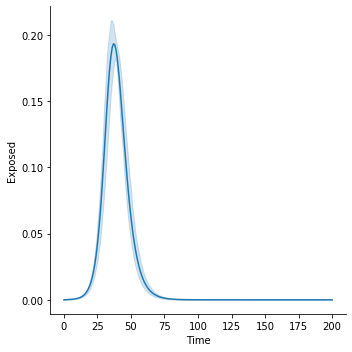

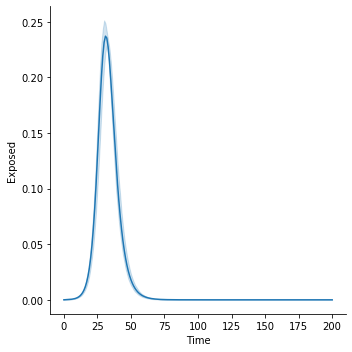

In [67]:
fig, ax =plt.subplots(1,3)

sns.relplot(x="Time", y="Exposed",
             kind="line", data=baseline[baseline.R0 < 3])

sns.relplot(x="Time", y="Exposed",
             kind="line", data=baseline[baseline.R0 >= 3][baseline.R0 < 4])

sns.relplot(x="Time", y="Exposed",
             kind="line", data=baseline[baseline.R0 >= 4][baseline.R0 < 5]);

sns.relplot(x="Time", y="Exposed",
             kind="line", data=baseline[baseline.R0 >= 5]);

fig.show()

<Figure size 1600x800 with 0 Axes>

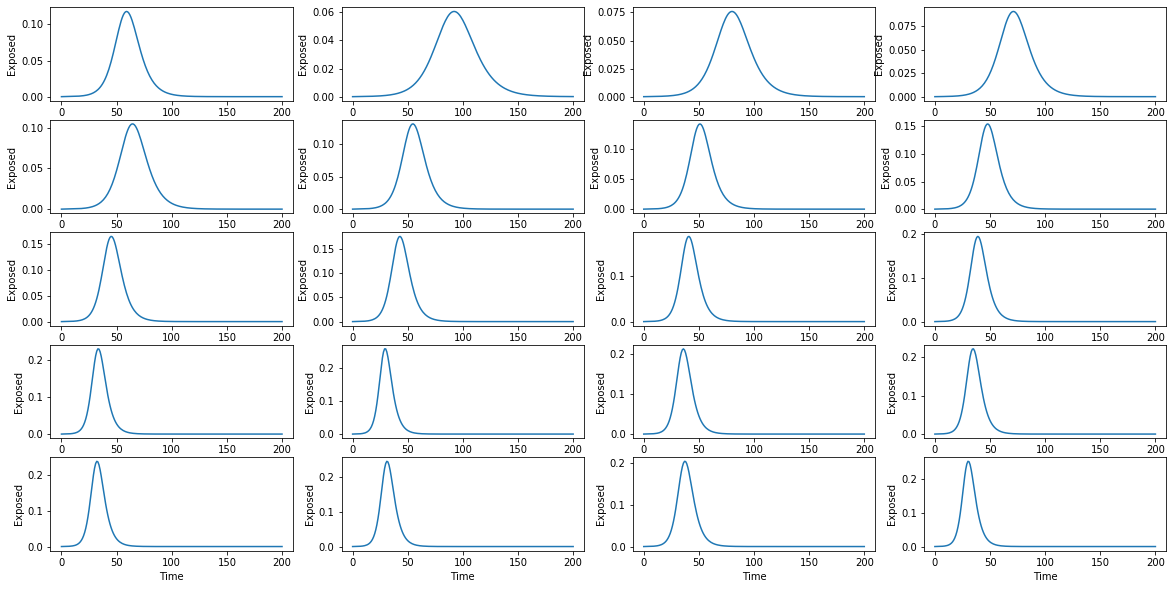

In [85]:
fig, ax =plt.subplots(5,4, figsize = (20,10))
r0_vals = list(set(baseline.R0))

for r0_val, axis in zip(r0_vals, ax.flatten()):
    sns.lineplot(x="Time", y="Exposed",
            data=baseline[baseline.R0 == r0_val], ax = axis)